# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [2]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [3]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


Text(0,0.5,'N225 index')

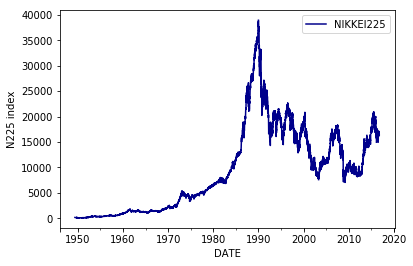

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

plt.show()を追加することにより出力の仕方が変わりました。

In [5]:
price = web.DataReader("aapl", 'morningstar',"1990/1/4",end)#yahooのサービスの停止により変更
price=price.reset_index() #indexの解除
del price["Symbol"] #Symbolの削除
ind=price["Date"]#新しいインデックスの作成
price=price.iloc[:,1:]#新しいデータの作成
price.index=ind#新しいインデックスに入れ替え
price.head(1)

,Close,High,Low,Open,Volume
Date,,,,,
1990-01-04,1.3438,1.3839,1.3304,1.3438,55378400


In [6]:
print(price.tail(1))

             Close    High    Low    Open    Volume
Date                                               
2016-09-30  113.05  113.37  111.8  112.46  36379106


## 4.2 データベースの加工

Text(0,0.5,'correlation')

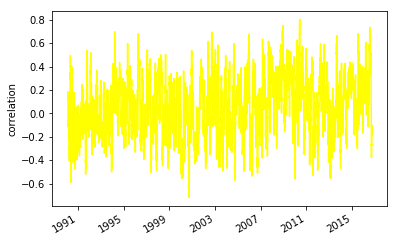

In [7]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

             Close    High     Low    Open    Volume
Date                                                
2015-01-01  110.38  110.38  110.38  110.38         0
2015-01-02  109.33  111.44  107.35  111.39  53204626


Text(0,0.5,'apple')

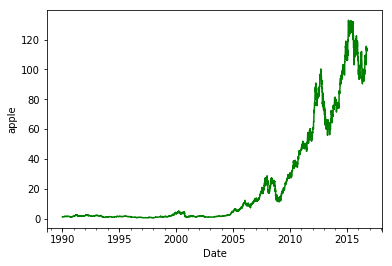

In [9]:
#price = web.DataReader("aapl", 'yahoo','1990/1/1',end)#yahooのサービスの停止により変更
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [10]:
print(price.resample('M').first().tail())

             Close     High     Low     Open    Volume
Date                                                  
2016-05-31   93.64   94.080   92.40   93.965  48160104
2016-06-30   98.46   99.540   98.33   99.020  29173285
2016-07-31   95.89   96.465   95.33   95.490  26026540
2016-08-31  106.05  106.150  104.41  104.410  38167871
2016-09-30  106.73  106.800  105.62  106.140  26701523


In [11]:
print(price.resample('M').last().tail())

             Close      High     Low    Open    Volume
Date                                                  
2016-05-31   99.86  100.4000   98.82   99.60  42307212
2016-06-30   95.60   95.7700   94.30   94.44  35836356
2016-07-31  104.21  104.5500  103.68  104.19  27733688
2016-08-31  106.10  106.5699  105.64  105.66  29656620
2016-09-30  113.05  113.3700  111.80  112.46  36379106


In [12]:
print(price.resample('M',loffset='1d').last().tail())

             Close      High     Low    Open    Volume
Date                                                  
2016-06-01   99.86  100.4000   98.82   99.60  42307212
2016-07-01   95.60   95.7700   94.30   94.44  35836356
2016-08-01  104.21  104.5500  103.68  104.19  27733688
2016-09-01  106.10  106.5699  105.64  105.66  29656620
2016-10-01  113.05  113.3700  111.80  112.46  36379106


Text(0,0.5,'apple')

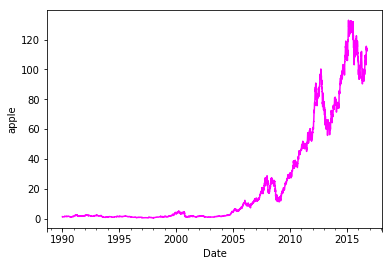

In [13]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [14]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.45627477816594186 6977


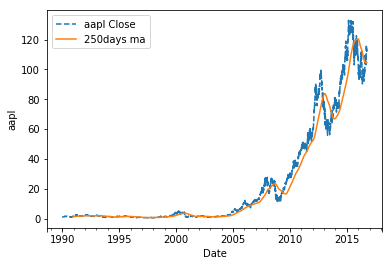

In [15]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

Text(0,0.5,'standrd deviation 250 days aapl')

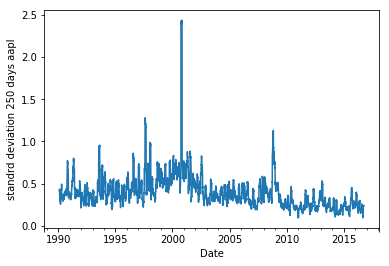

In [16]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')